In [2]:
library(readr)
library(lattice)
library(corrplot)
countries = read_csv('Countries.csv')

Parsed with column specification:
cols(
  Country = col_integer(),
  Name = col_character(),
  GDPPC = col_integer(),
  Literacy = col_double(),
  InfantMortality = col_double(),
  Agriculture = col_double(),
  Population = col_integer(),
  NetMigration = col_double()
)


### Research Question 1: Which explanatory variables are most related to InfantMortality?

### Research Question 2: What is the best model for predicting GDPPC and do these variables sufficiently explain GDPPC? 

Taking a peak at the data 

In [3]:
head(countries)

Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
1,Albania,3965,0.987,14.0,0.227,3038594,-3.3
2,Algeria,4206,0.800,27.7,0.107,39670000,-0.9
3,Andorra,42500,1.000,3.6,0.006,86165,0.0
4,Angola,4102,0.711,76.5,0.050,25020000,-0.1
5,Anguilla,8800,0.950,3.4,0.029,15000,11.9
6,Argentina,13432,0.981,11.1,0.082,43420000,-0.1


We remove the categorical columns because that doesn't make sense for scatter plots

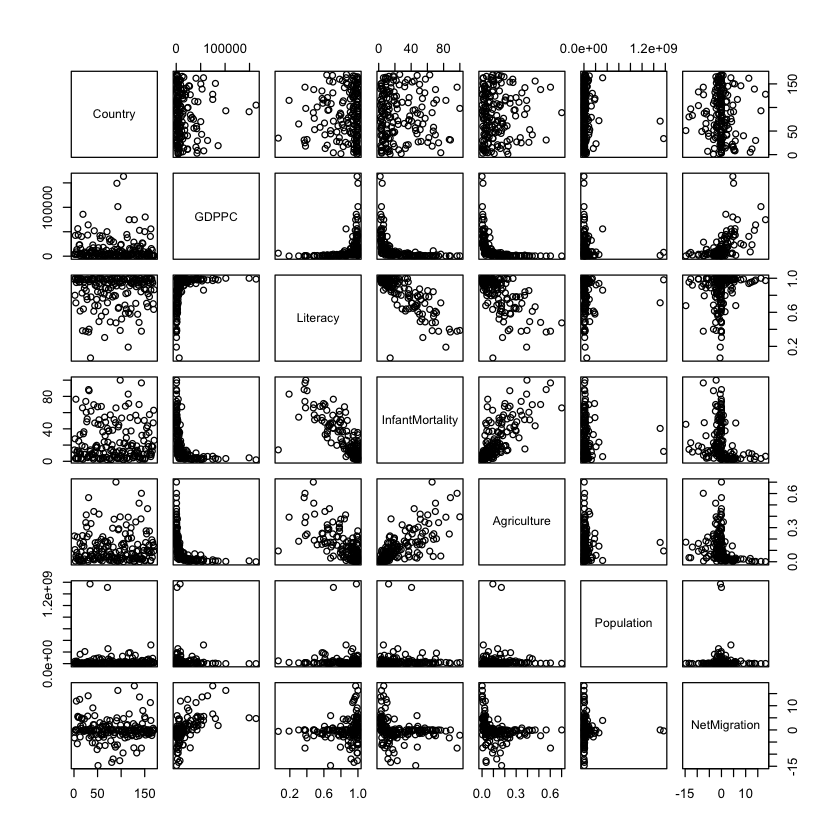

In [4]:
categorical_cols <- c("Name")
countries_numeric = countries[ , !(names(countries) %in% categorical_cols)]
pairs(countries_numeric)

The Literacy and Agriculture variables plotted against InfantMortality look more linear (i.e. more correlated with each other). This is in contrast to most of the other plots, so we will focus on these. The correlation matrix plot below also supports this. 

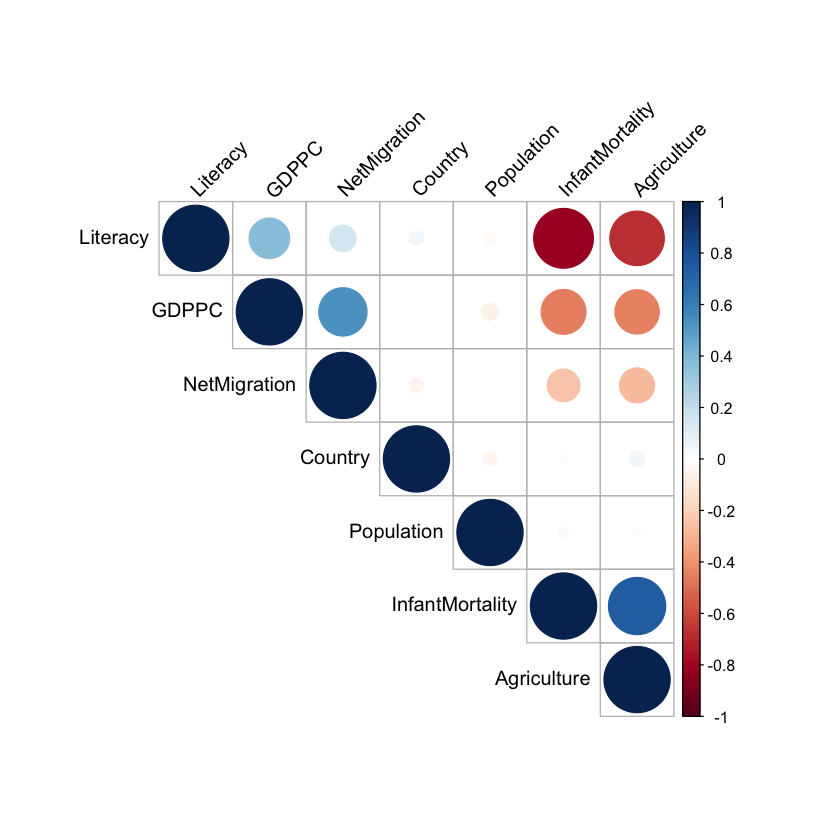

In [24]:
countries_corr_matrix <- cor(countries_numeric)
corrplot(countries_corr_matrix, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

##### Zoomed in versions of the associations we will be exploring

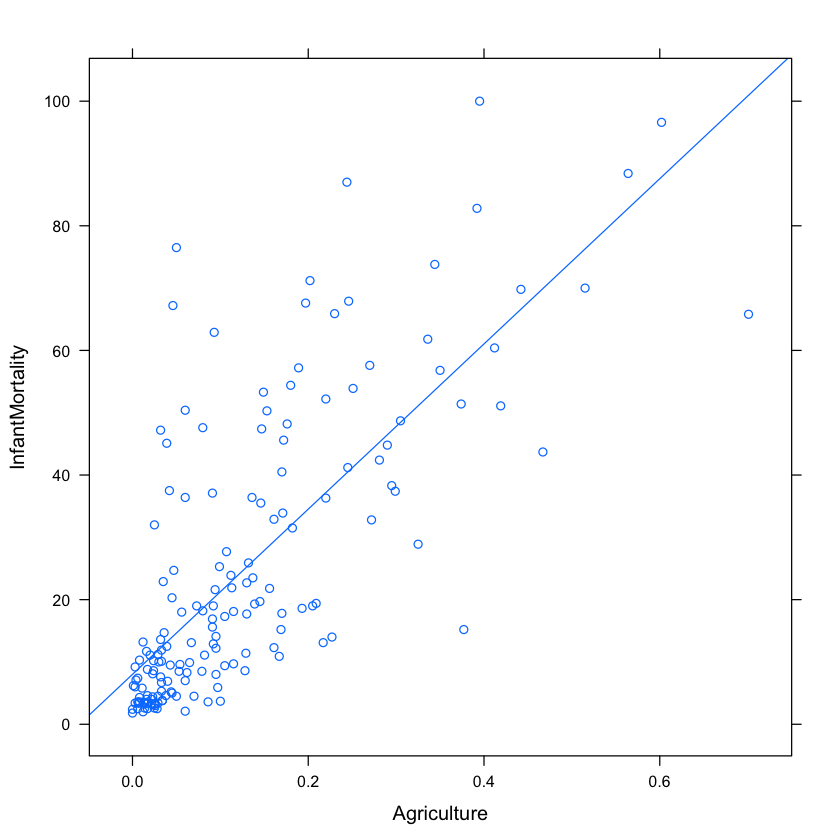

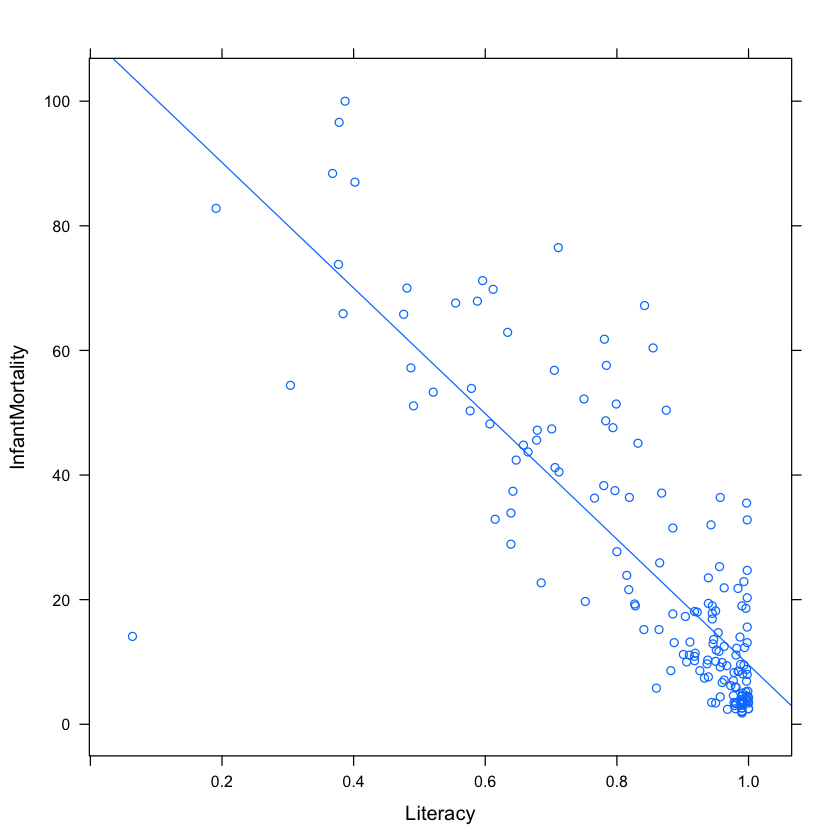

In [99]:
xyplot(InfantMortality ~ Agriculture, data=countries, type=c('p', 'r'), auto.key=TRUE)
xyplot(InfantMortality ~ Literacy, data=countries, type=c('p', 'r'), auto.key=TRUE)

In [76]:
infantVsAgriculture = lm(InfantMortality ~ Agriculture, data=countries)
summary(infantVsAgriculture)


Call:
lm(formula = InfantMortality ~ Agriculture, data = countries)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.794  -7.892  -4.342   3.211  61.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.009      1.635   4.899 2.25e-06 ***
Agriculture  132.586      9.102  14.566  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.51 on 168 degrees of freedom
Multiple R-squared:  0.5581,	Adjusted R-squared:  0.5555 
F-statistic: 212.2 on 1 and 168 DF,  p-value: < 2.2e-16


##### There is clearly a relationship b/w Agriculture and InfantMortality based on the p-value that is approaching zero, but the $r^2$ is only .556 so we will try out the same with literacy

In [79]:
infantVsLiteracy = lm(InfantMortality ~ Literacy, data=countries)
summary(infantVsLiteracy)


Call:
lm(formula = InfantMortality ~ Literacy, data = countries)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.771  -7.159  -3.454   4.953  41.727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  110.320      4.822   22.88   <2e-16 ***
Literacy    -100.769      5.520  -18.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.51 on 168 degrees of freedom
Multiple R-squared:  0.6648,	Adjusted R-squared:  0.6628 
F-statistic: 333.2 on 1 and 168 DF,  p-value: < 2.2e-16


##### There is clearly a relationship b/w Literacy and InfantMortality based on the p-value that is approaching zero, but, similar to the model using Agriculture, the $r^2$ is  .66 so we will try out a final model using both variables 

In [86]:
agricultureLiteracyInfantFirst = lm(InfantMortality ~ 
                               Agriculture*Literacy + I(Literacy^2) + I(Agriculture^2),
                               data=countries)
summary(agricultureLiteracyInfantFirst)


Call:
lm(formula = InfantMortality ~ Agriculture * Literacy + I(Literacy^2) + 
    I(Agriculture^2), data = countries)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.627  -4.986  -1.729   3.590  42.757 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)              6.44      15.06   0.428 0.669481    
Agriculture            204.14      62.49   3.267 0.001324 ** 
Literacy               122.00      32.56   3.747 0.000247 ***
I(Literacy^2)         -124.84      20.75  -6.017 1.12e-08 ***
I(Agriculture^2)      -118.97      55.12  -2.158 0.032346 *  
Agriculture:Literacy  -138.06      55.17  -2.502 0.013314 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.89 on 164 degrees of freedom
Multiple R-squared:  0.7872,	Adjusted R-squared:  0.7807 
F-statistic: 121.3 on 5 and 164 DF,  p-value: < 2.2e-16


### We see with a higher order model that we get about a 12% increase in the $r^2$ value. However, Agriculture^2 and Agriculture:Literacy have higher p-values so they don't appear to contribute as much to the model

In [102]:
agricultureLiteracyInfantSecond = lm(sqrt(InfantMortality) ~ 
                               Literacy + Agriculture + I(Literacy^2),
                               data=countries)
summary(agricultureLiteracyInfantSecond)


Call:
lm(formula = sqrt(InfantMortality) ~ Literacy + Agriculture + 
    I(Literacy^2), data = countries)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3436 -0.6971 -0.1494  0.4874  3.5355 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.8361     0.8986   4.269 3.29e-05 ***
Literacy       12.8192     2.5780   4.972 1.64e-06 ***
Agriculture     4.7399     0.8809   5.381 2.49e-07 ***
I(Literacy^2) -14.3672     1.8761  -7.658 1.48e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.066 on 166 degrees of freedom
Multiple R-squared:  0.7804,	Adjusted R-squared:  0.7765 
F-statistic: 196.7 on 3 and 166 DF,  p-value: < 2.2e-16


### Now the p-values of each variable is showing reasonable significance of the variables. So we will consider this model better because it is simpler than the previous and the $r^2$ is only 1% lower

##### Theoretical model: $$ Y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \beta_3x_2 + \epsilon $$<br>, where $x_1$ is Literacy, $x_2$ is Agriculture, and $Y$ is InfantMortality

##### Predicted model: $$\hat{Y} = 36.214 + 78.814x_1 - 111.751x_1^2 + 50.095x_2$$

##### Assessing model assumptions: 

The QQ plot trails off a lot at the tails, indicating that the normality assumptions is violated. The residuals vs fit graph looks good. It indicates approximately zero mean and constant variance of the error terms. Since normality is violated, we cannot use this model for inference

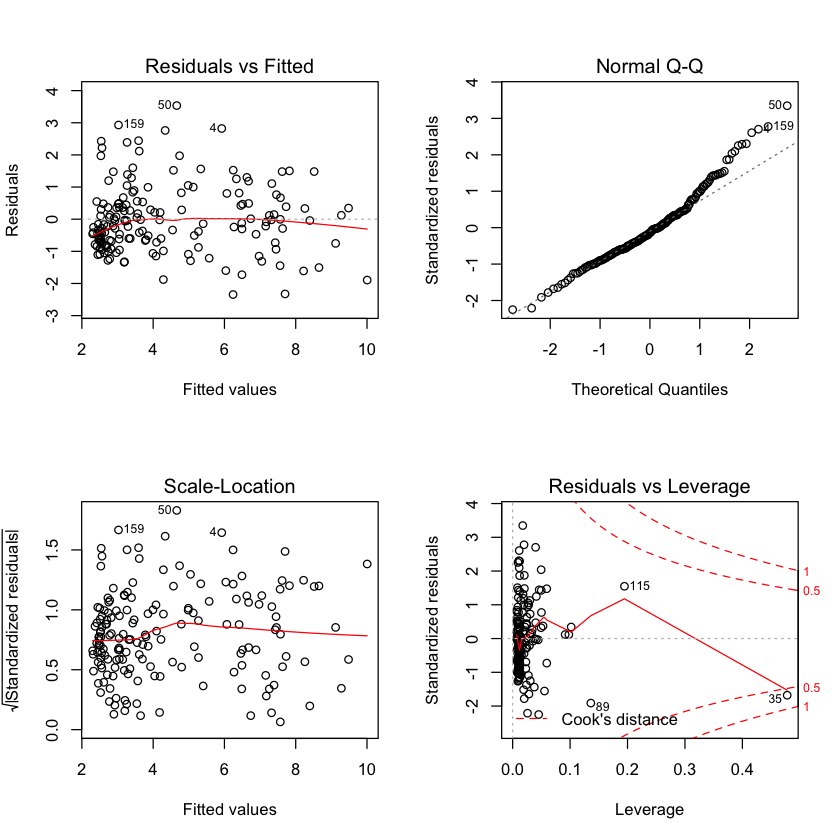

In [103]:
par(mfrow=c(2,2))
plot(agricultureLiteracyInfantSecond)